In [1]:
import pandas as pd

df_software = pd.read_csv('C:\\Users\\aksha\\data_analysis_job_market\\dataset\\software_jobs.csv')
df_software

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

file = "C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv"
df = pd.read_csv(file)
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:

## clean the above data by converting the string date time into a date time object 
df_US = df[df['job_country']=='United States'].copy()
df_US.head()

df_US['job_posted_date'] = pd.to_datetime(df_US['job_posted_date'])
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')




In [4]:
## Now I have the months in words , lets see how that looks like
df_US.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [5]:
## to make any meaningful connection between the two data sets , we have to have smiliar data's 
## in both sets. So we have to convert our data set into a pivot table which has the count of 
## job postings per month per occupation index = month , columns = job_title_short , values = number of jobs

median_yearly_salary = df_US['salary_year_avg'].median()
df_US['salary_year_avg'] = df_US['salary_year_avg'].fillna(median_yearly_salary)
df_US_high_pay = df_US.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
df_US_high_pay.head()

jobs_with_highpay = df_US_high_pay.head().index.tolist()

## data frame containing only jobs that have high pay

df_high_pay_jobs = df_US[df_US['job_title_short'].isin(jobs_with_highpay)].copy()
df_high_pay_jobs.head()





,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,119187.5,NaN,Boehringer Ingelheim,NaN,NaN,June
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,119187.5,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,119187.5,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
13,Senior Data Engineer,Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Texas, United States",2023-11-15 13:08:52,True,True,United States,NaN,119187.5,NaN,Nayya,"['python', 'sql', 'go', 'ruby', 'ruby', 'javas...","{'cloud': ['aws'], 'other': ['terraform'], 'pr...",November
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,NaN,119187.5,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",June


In [6]:


## let's convert the above into a pivot table to get a summary of the number of jobs posted per month for the top jobs

df_summary = df_high_pay_jobs.pivot_table(
                        index = 'job_posted_month',
                        columns = 'job_title_short',
                        aggfunc = 'size'
)
print(df_summary)

df_summary.reset_index(inplace = True)

job_title_short   Data Scientist  Machine Learning Engineer  Senior Data Engineer  Senior Data Scientist  Software Engineer
job_posted_month                                                                                                           
April                       4867                         51                   781                    991                112
August                      6318                         68                   903                   1515                194
December                    3472                        119                   689                    752                212
February                    4956                         56                   878                   1127                 90
January                     6915                         60                   773                   1552                114
July                        4876                         65                   747                   1095                153
June    

In [7]:
## now I have to sort the month value which can't be done directly so I will convert it 

df_summary['month_no']= pd.to_datetime(df_summary['job_posted_month'],format='%B').dt.month
df_summary.set_index('month_no',inplace=True)

In [8]:
df_summary.sort_index(inplace=True)


In [9]:
df_summary.reset_index('month_no',inplace=True)
df_summary.drop('month_no',axis=1,inplace=True)



In [10]:
## lets now create a new dataframe by merging the software and data analysts jobs 

df_data = df_summary.copy()


In [11]:
df_data.head()

job_title_short,job_posted_month,Data Scientist,Machine Learning Engineer,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,January,6915,60,773,1552,114
1,February,4956,56,878,1127,90
2,March,4779,59,829,1150,115
3,April,4867,51,781,991,112
4,May,4377,49,746,914,90


In [12]:
df_data.index

RangeIndex(start=0, stop=12, step=1)

In [13]:
#merging two data sets 

df_combined = df_software.merge(df_data, on='job_posted_month')
df_combined.head(12)

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer,Data Scientist,Machine Learning Engineer,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,January,13619,9827,5108,4348,6915,60,773,1552,114
1,February,11456,9116,7298,4284,4956,56,878,1127,90
2,March,11102,8178,5814,4159,4779,59,829,1150,115
3,April,14037,9209,7232,4220,4867,51,781,991,112
4,May,12126,8864,6718,4980,4377,49,746,914,90
5,June,12003,8065,5902,4781,4645,48,812,1033,93
6,July,11914,8061,6839,4344,4876,65,747,1095,153
7,August,11571,8191,7413,4104,6318,68,903,1515,194
8,September,14016,8447,6139,4094,4568,113,775,1014,228
9,October,11419,8476,5026,4389,4882,101,672,987,219


Text(0.5, 1.0, 'Job postings for high paying jobs over a year')

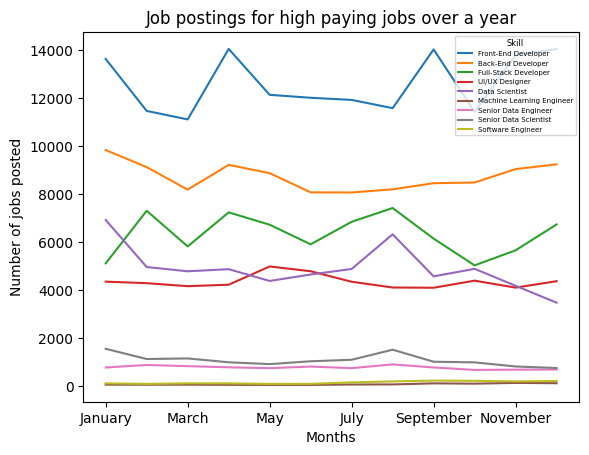

In [17]:
import matplotlib.pyplot as plt

#top_5 = df_combined.sum().sort_values(ascending=False).head(5).index

top_5=df_combined.columns[:5]
top_5=top_5.tolist()
df_combined[top_5].set_index('job_posted_month')
df_combined.plot(x='job_posted_month',kind='line')
plt.legend(title='Skill', loc='upper right', fontsize=5, title_fontsize=6)
plt.ylabel('Number of jobs posted')
plt.xlabel('Months')
plt.title('Job postings for high paying jobs over a year')
